# Group06
- Simão Costa - 20241772
- Leonardo Rodrigues - 
- Jaime Abreu - 
- Murshid Kazi - 20240642

In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
from bs4 import BeautifulSoup

### Data Wrangling and Analysis 

In [5]:
data=pd.read_csv('city_data.csv',sep='|', skiprows=1)
data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11 00:00:00
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10 00:00:00
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07 00:00:00
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,309.0,2023-06-08 00:00:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,86,84,Berlin. Germany,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population Density,85.0,NaN,NaN,NaN,1115.141176,2542.778533,65.0,304.0,548.0,1020.0,20983.0
Population,86.0,NaN,NaN,NaN,1754370.5,1843133.29993,73895.0,528118.5,1178397.0,2315896.0,12396541.0
Working Age Population,85.0,NaN,NaN,NaN,1158293.623529,1232533.810675,46359.0,358020.0,733794.0,1534225.0,8274794.0
Youth Dependency Ratio,86.0,NaN,NaN,NaN,24.09686,3.266421,19.3,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,NaN,NaN,NaN,6.667059,4.553632,1.4,3.7,5.3,8.1,23.0
GDP per Capita,85.0,NaN,NaN,NaN,51750.269647,21495.617843,10089.92,38664.0,49329.0,63083.0,146094.0
Days of very strong heat stress,86.0,NaN,NaN,NaN,4.348837,10.038476,0.0,0.0,1.0,3.0,59.0
Main Spoken Languages,85,54,Italian,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Monthly Salary,86.0,NaN,NaN,NaN,2434.488372,1188.602984,750.0,1412.5,2400.0,3200.0,6636.0


In [8]:
data.rename(columns={'Avgerage Rent Price':'Average Rent Price'}, inplace=True)   #fixing typos
data.rename(columns={'Working Age Population ':'Working Age Population'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [9]:
data['Last Data Update'] = pd.to_datetime(data['Last Data Update'], errors='coerce')   #convert to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Average Rent Price               86 non-null     int64         


In [10]:
dupes = data.duplicated(subset=['City'])    #checking if we have duplicates
print("Duplicates found:", dupes.sum())

Duplicates found: 2


In [11]:
data[data.duplicated(subset=['City'], keep=False)].sort_values('City')   #showing the duplicates

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
32,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27
33,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27


In [12]:
data = data.sort_values('Last Data Update').drop_duplicates(subset=['City'], keep='last')  #deleting the duplicates
print("Duplicates found:", data.duplicated(subset=['City']).sum())  #making sure we don't have any more duplicates

Duplicates found: 0


In [13]:
data.isna().sum().sort_values(ascending=False)  #checking missing values

Average Price Groceries            78
Population Density                  1
Working Age Population              1
Unemployment Rate                   1
GDP per Capita                      1
Main Spoken Languages               1
City                                0
Population                          0
Youth Dependency Ratio              0
Days of very strong heat stress     0
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Last Data Update                    0
dtype: int64

In [14]:
data.drop(columns=['Average Price Groceries'], inplace=True)  #dropping 'Average Price Groceries'

In [15]:
num_cols = ['Population Density', 'Working Age Population', 'Unemployment Rate', 'GDP per Capita']
for col in num_cols:    #filling in the missing values with the median value
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())
data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
10,"Basel, Switzerland",793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19
20,"Frankfurt am Main, Germany",631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
18,"Munich, Germany",529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
59,"Venice, Italy",852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,"Leeds, United Kingdom",517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03
19,"Cologne, Germany",1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23
60,"Luxembourg, Luxembourg",236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,2024-11-29
13,"Prague, Czechia",388.0,2231212,1445800.0,26.2,1.4,64996.0,1,"Czech, English",1860,100,1590,2024-12-05


In [16]:
data[['City','Country']]=data['City'].str.split(', ', n=1, expand=True)

In [17]:
#putting the column 'Country' after 'City'
cols=data.columns.tolist()
cols.remove('Country')
cols.insert(cols.index('City')+1, 'Country')
data=data[cols]
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19
20,Frankfurt am Main,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
82,Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
18,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
59,Venice,Italy,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03
19,Cologne,Germany,1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23
60,Luxembourg,Luxembourg,236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,2024-11-29
13,Prague,Czechia,388.0,2231212,1445800.0,26.2,1.4,64996.0,1,"Czech, English",1860,100,1590,2024-12-05


##### Let's see if there is any data that didn't got processed

In [18]:
problem_rows = data[data['Country'].isna()][['City']]
problem_rows

,City
16,Berlin. Germany
12,Lemesos;Cyprus


##### Looks like we have some data that didn't got processed. We have to take care of that!

In [19]:
data[['City','Country2']]=data['City'].str.split(';', n=1, expand=True)
data[['City','Country3']]=data['City'].str.split('.', n=1, expand=True)
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Country2,Country3
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19,None,None
20,Frankfurt am Main,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04,None,None
82,Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,None,None
18,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16,None,None
59,Venice,Italy,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03,None,None
19,Cologne,Germany,1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23,None,None
60,Luxembourg,Luxembourg,236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,2024-11-29,None,None
13,Prague,Czechia,388.0,2231212,1445800.0,26.2,1.4,64996.0,1,"Czech, English",1860,100,1590,2024-12-05,None,None


##### Let's join all the countries in the same column

In [20]:
data[['Country', 'Country2', 'Country3']] = data[['Country', 'Country2', 'Country3']].fillna('')
data['Country'] = data[['Country', 'Country2', 'Country3']].apply(lambda x: ', '.join(x[x != '']), axis=1)
data.drop(['Country2', 'Country3'], axis=1, inplace=True)
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19
20,Frankfurt am Main,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
82,Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
18,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
59,Venice,Italy,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03
19,Cologne,Germany,1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23
60,Luxembourg,Luxembourg,236.0,610825,424824.0,23.1,5.6,112143.0,2,"Luxembourgish, French, German, English",4200,2100,3300,2024-11-29
13,Prague,Czechia,388.0,2231212,1445800.0,26.2,1.4,64996.0,1,"Czech, English",1860,100,1590,2024-12-05


In [21]:
problem_rows = data[data['Country'].isna()][['City']]  #checking to see if there is any more problems
problem_rows

,City


##### Our data is almost ready. Let's just reset the indexes and put it in alphabetical order

In [22]:
data = data.sort_values(by='Country').reset_index(drop=True) #odering the data in alphabetical order
data.index+=1
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Lyon,France,10909.0,520774,365824.0,27.31,6.9,46226.0,11,French,2300,1200,1800,2023-03-31
2,Berlin,Germany,304.0,5303922,3481212.0,21.30,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29
3,Greece,Athens,1829.0,3530371,2287174.0,22.00,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
4,Vienna,Austria,310.0,2983513,2018818.0,20.10,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
5,Salzburg,Austria,243.0,375489,250472.0,20.30,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Edinburgh,United Kingdom,527.0,907580,614959.0,23.40,3.7,54002.0,0,"English, Scots Gaelic",2500,1010,2050,2023-08-15
81,Liverpool,United Kingdom,1560.0,1544216,983056.0,26.80,7.5,33749.0,0,English,2250,950,1800,2024-01-23
82,Leeds,United Kingdom,517.0,2641062,1677791.0,30.00,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03
83,London,United Kingdom,1777.0,12396541,8274794.0,29.10,6.1,69863.0,0,"English, Urdu, Bengali, Polish",2750,1900,2800,2023-04-09


##### There is some problems with the ordering. Let's fix it

In [23]:
data['Country'] = data['Country'].str.strip()
data = data.sort_values(by='Country').reset_index(drop=True)
data.index+=1
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Greece,Athens,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
2,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
3,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
4,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
5,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,London,United Kingdom,1777.0,12396541,8274794.0,29.1,6.1,69863.0,0,"English, Urdu, Bengali, Polish",2750,1900,2800,2023-04-09
81,Edinburgh,United Kingdom,527.0,907580,614959.0,23.4,3.7,54002.0,0,"English, Scots Gaelic",2500,1010,2050,2023-08-15
82,Liverpool,United Kingdom,1560.0,1544216,983056.0,26.8,7.5,33749.0,0,English,2250,950,1800,2024-01-23
83,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03


##### It seems that in the first row we have the city and the country switched. Let's fix it

In [24]:
row=1
data.at[row, 'City'], data.at[row, 'Country'] = data.at[row, 'Country'], data.at[row, 'City']
data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Athens,Greece,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
2,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
3,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
4,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
5,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,London,United Kingdom,1777.0,12396541,8274794.0,29.1,6.1,69863.0,0,"English, Urdu, Bengali, Polish",2750,1900,2800,2023-04-09
81,Edinburgh,United Kingdom,527.0,907580,614959.0,23.4,3.7,54002.0,0,"English, Scots Gaelic",2500,1010,2050,2023-08-15
82,Liverpool,United Kingdom,1560.0,1544216,983056.0,26.8,7.5,33749.0,0,English,2250,950,1800,2024-01-23
83,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03


##### Now he have to order it again

In [25]:
data = data.sort_values(by='Country').reset_index(drop=True) #odering the data in alphabetical order
data.index+=1
data    #it's order per country but the cities are all messed up

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
2,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
3,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
4,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
5,Gent,Belgium,552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Leeds,United Kingdom,517.0,2641062,1677791.0,30.0,3.5,37990.0,0,"English, Urdu",2300,1000,2000,2024-11-03
81,London,United Kingdom,1777.0,12396541,8274794.0,29.1,6.1,69863.0,0,"English, Urdu, Bengali, Polish",2750,1900,2800,2023-04-09
82,Edinburgh,United Kingdom,527.0,907580,614959.0,23.4,3.7,54002.0,0,"English, Scots Gaelic",2500,1010,2050,2023-08-15
83,Liverpool,United Kingdom,1560.0,1544216,983056.0,26.8,7.5,33749.0,0,English,2250,950,1800,2024-01-23


##### Let's see if we have any missing values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 1 to 84
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               84 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           84 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                84 non-null     float64       
 7   GDP per Capita                   84 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            83 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


##### We have a missing value. Let's create a label specifically for it.

In [27]:
object_col = data.select_dtypes(include='object').columns
data[object_col] = data[object_col].fillna("Unknown")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 1 to 84
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               84 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           84 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                84 non-null     float64       
 7   GDP per Capita                   84 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            84 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


##### Ok, everything is done for now!

### Question 1

##### How did you handle missing values and duplicate records in the dataset? Justify your approach.

To take care of the missing values, we substitute them with the median for the numerical values because it represents better the skewness than the mean. For the categorical values we imputed a dedicated label called "Unknown" to preserve the information from the missing values. In the case of the column 'Average Price Groceries', we just deleted it from our dataset because it is of no value since we only had 6 values.

The duplicated values were identified and removed since they don't have any additional information.

### Question 2

##### a) Which country appears most frequently in the dataset? How many cities areassociated with it?

In [28]:
country_counts = data['Country'].value_counts()  #counting how many times each country appears in the dataset
top_country = country_counts.idxmax()    #getting the most frequent country
num_cities = country_counts.max()        #getting the numbers of city the country has in the dataset
print(f"Country with most cities: {top_country}, with {num_cities} cities")

Country with most cities: Germany, with 10 cities


##### b) How many cities are present in total? How many are associated with Greece?

In [29]:
print(f"We have {data['City'].nunique()} cities, which {data[data['Country']=='Greece']['City'].nunique()} are in Greece")

We have 84 cities, which 2 are in Greece


##### c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

For this question, we considered the least spoken languages the ones that are talked in the least number of cities.

In [30]:
data['Main Spoken Languages']= data['Main Spoken Languages'].str.replace(';', ',')
data_exploded = data.assign(Languages=data['Main Spoken Languages'].str.split(',')).explode('Languages')
data_exploded['Languages'] = data_exploded['Languages'].str.strip()
language_counts = data_exploded['Languages'].value_counts()
language_counts= language_counts.drop('Unknown', errors= 'ignore')
least_spoken = []
for language, count in language_counts.items():
    if count==1:
        least_spoken.append(language)

In [31]:
top_3 = language_counts.head(3)
languages_t3 = ', '.join(top_3.index)+ '.'   # join the index (language names) with commas
print(f'The 3 most spoken languages are: {languages_t3}')

The 3 most spoken languages are: English, German, Turkish.


In [32]:
languages_l=', '.join(least_spoken)+ '.'
print("The least spoken languages are", languages_l)

The least spoken languages are Scots Gaelic, Bengali, Serbian, Valencian, Catalan, Romanian, Slovene, Slovak, Maltese, Luxembourgish, Latvian, Estonian, Scots.


#### Question 3

##### a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [33]:
to_upload = data[data['Last Data Update'] < "2023-04-01"]
update=', '.join(to_upload['City'])+ '.'
print(f'These cities require an update: {update}')

These cities require an update: Lyon, Frankfurt am Main, Munich, Venice, Gothenburg, Basel.


##### b) How many days ago was the last update? On what day, month, and year did it occur?

In [34]:
last_update = data['Last Data Update'].max()
print(f'The last update was in {last_update.day} {last_update.strftime("%B")} {last_update.year}')

The last update was in 12 December 2024


#### Question 4

##### a) How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

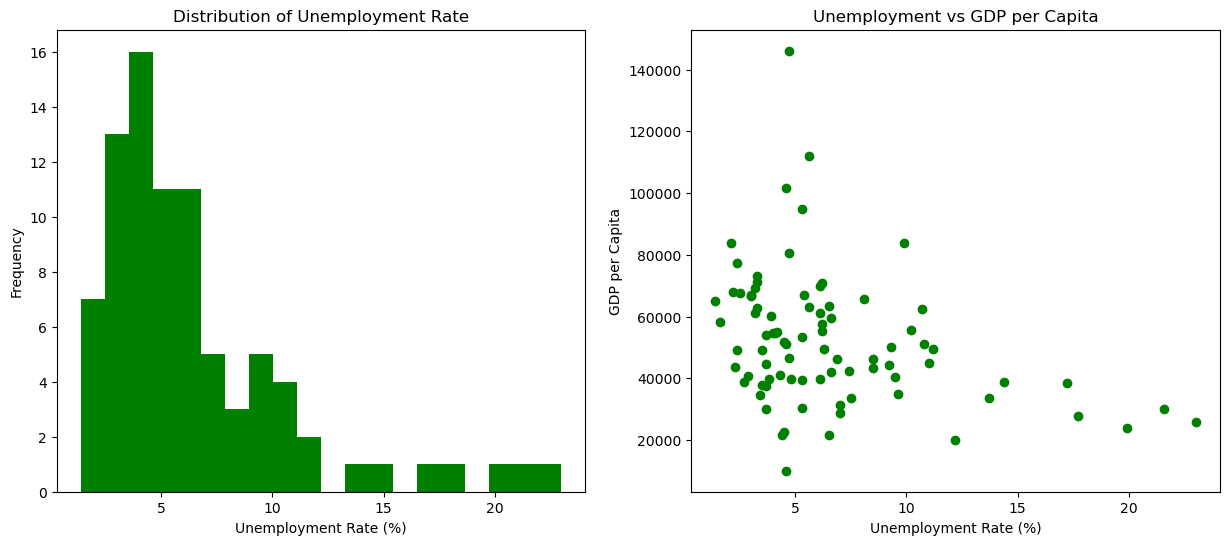

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(data['Unemployment Rate'], bins=20, color='green')
axes[0].set_title('Distribution of Unemployment Rate')
axes[0].set_xlabel('Unemployment Rate (%)')
axes[0].set_ylabel('Frequency')

axes[1].scatter(data['Unemployment Rate'], data['GDP per Capita'], color='green')
axes[1].set_title('Unemployment vs GDP per Capita')
axes[1].set_xlabel('Unemployment Rate (%)')
axes[1].set_ylabel('GDP per Capita')

plt.show()

In [36]:
corr = data['Unemployment Rate'].corr(data['GDP per Capita'])
print("The correlation has a value of", corr)

The correlation has a value of -0.3392607671353986


##### b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations.

In [37]:
data['Difference'] = data['Average Monthly Salary'] - data['Average Cost of Living']
top10_cities = data.nlargest(10, 'Difference')[['City','Difference']]
country_diff = data.groupby('Country')['Difference'].mean().sort_values()
top10_countries = country_diff.head(10)

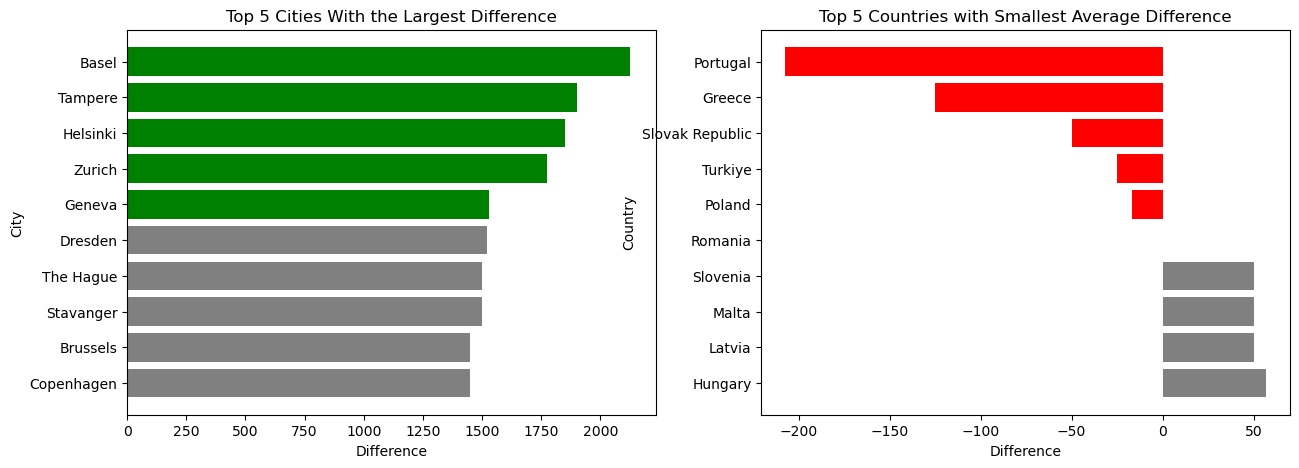

In [38]:
# Create figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,5))   # width=15, height=5

#left barchart
colors = ['green']*5 + ['grey']*5
axes[0].barh(top10_cities['City'], top10_cities['Difference'], color=colors)
axes[0].invert_yaxis()
axes[0].set_title('Top 5 Cities With the Largest Difference')
axes[0].set_xlabel('Difference')
axes[0].set_ylabel('City')

#right barchart
colors=['red']*5 + ['grey']*5
axes[1].barh(top10_countries.index, top10_countries.values, color=colors)
axes[1].invert_yaxis()
axes[1].set_title('Top 5 Countries with Smallest Average Difference')
axes[1].set_xlabel('Difference')
axes[1].set_ylabel('Country')

plt.show()

##### c) Which is the best city for someone seeking: 
- an average monthly salary above €2000,
- a cost of living below or equal to €1600, and
- the lowest unemployment rate possible?

In [39]:
filtered = data[(data['Average Monthly Salary'] > 2000) & (data['Average Cost of Living'] <= 1600)]
best = filtered.sort_values('Unemployment Rate').head(1)
if filtered.empty:
    print("No city meets all criteria")
print(f'The best city for this specific criteria is {best['City'].values[0]}.')

The best city for this specific criteria is Dresden.


#### Question 5

##### What are three additional insights you find meaningful when comparing the given cities?

In [40]:
#someone please do this
#maybe create a relation between the weather and something else

### Web Scrapping

In [41]:
link='https://en.wikipedia.org/wiki/Main_Page'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}
r=requests.get(link, headers=headers)
soup=BeautifulSoup(r.text, 'html.parser')

In [42]:
#i dont't know if this is correct, i need to start from the main page but the search url just got there out of nowhere

In [43]:
def find_city_page(city, country):
    search_query = f"{city} {country}".replace(" ", "+")
    search_url = f"https://en.wikipedia.org/w/index.php?search={search_query}"
    
    r = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")

    # 1. Try direct redirect: canonical link
    canonical = soup.select_one('link[rel="canonical"]')
    if canonical:
        page_url = canonical.get("href")
        if "wiki" in page_url and "search" not in page_url:
            return page_url

    # 2. Try normal search results
    result = soup.select_one(".mw-search-result-heading a")
    if result:
        return "https://en.wikipedia.org" + result.get("href")

    return None


In [44]:
def get_coordinates(url):
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")
    
    coord_tag = soup.select_one(".geo")
    if coord_tag:
        lat, lon = coord_tag.text.split(";")
        return float(lat.strip()), float(lon.strip())
    
    return None, None


In [45]:
def scrape_city_coordinates(city, country):
    page_url = find_city_page(city, country)
    if page_url is None:
        return None, None
    
    return get_coordinates(page_url)


In [46]:
data['Latitude'] = None
data['Longitude'] = None

In [47]:
import time

for idx, row in data.iterrows():
    city = row['City']
    country = row['Country']

    # Skip rows already scraped (useful if rerunning)
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        continue

    print(f"Scraping {city}, {country}...")

    lat, lon = scrape_city_coordinates(city, country)

    data.loc[idx, 'Latitude'] = lat
    data.loc[idx, 'Longitude'] = lon

    time.sleep(1)  # polite delay


Scraping Vienna, Austria...
Scraping Salzburg, Austria...
Scraping Brussels, Belgium...
Scraping Antwerp, Belgium...
Scraping Gent, Belgium...
Scraping Bruges, Belgium...
Scraping Dobrich, Bulgaria...
Scraping Sofia, Bulgaria...
Scraping Split, Croatia...
Scraping Zagreb, Croatia...
Scraping Lefkosia, Cyprus...
Scraping Lemesos, Cyprus...
Scraping Prague, Czechia...
Scraping Ostrava, Czechia...
Scraping Copenhagen, Denmark...
Scraping Odense, Denmark...
Scraping Tallinn, Estonia...
Scraping Helsinki, Finland...
Scraping Tampere, Finland...
Scraping Lyon, France...
Scraping Toulouse, France...
Scraping Paris, France...
Scraping Dresden, Germany...
Scraping Berlin, Germany...
Scraping Frankfurt am Main, Germany...
Scraping Leipzig, Germany...
Scraping Hanover, Germany...
Scraping Dusseldorf, Germany...
Scraping Munich, Germany...
Scraping Cologne, Germany...
Scraping Stuttgart, Germany...
Scraping Hamburg, Germany...
Scraping Thessaloniki, Greece...
Scraping Athens, Greece...
Scraping Bu

In [54]:
failed = data[data['Latitude'].isna() | data['Longitude'].isna()]
failed[['City','Country']]

,City,Country
2,Salzburg,Austria
14,Ostrava,Czechia
71,Madrid,Spain


In [49]:
def scrape_with_relaxed_search(city):
    page_url = find_city_page(city, "")
    if page_url:
        return get_coordinates(page_url)
    return None, None

In [57]:
# scrape_with_relaxed_search('Salzburg')
# scrape_with_relaxed_search('Ostrava')
scrape_with_relaxed_search('Madrid')

(None, None)

In [59]:
def find_city_page_force(city):
    url = f"https://en.wikipedia.org/wiki/{city.replace(' ', '_')}"
    return url
lat, lon = get_coordinates(find_city_page_force("Madrid"))
print(lat, lon)
data.loc[data['City'] == 'Madrid', ['Latitude','Longitude']] = [lat, lon]

None None


In [52]:
# data.to_csv("city_data_with_coordinates.csv", index=False)
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Difference,Latitude,Longitude
1,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,439,48.20833,16.3725
2,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,1014,None,None
3,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,1450,50.84667,4.3525
4,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,656,51.21778,4.40028
5,Gent,Belgium,552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,1200,51.05361,3.72528


In [60]:
data[data['City']=='Madrid']

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Difference,Latitude,Longitude
71,Madrid,Spain,873.0,6882461,4617753.0,23.0,10.8,51020.0,18,Spanish,2271,1100,1589,2023-05-14,682,None,None


# MAP

In [103]:
import folium

# define Europe bounds
europe_bounds = [[34.0, -25.0], [72.0, 45.0]]

m = folium.Map(
    location=[54.5260, 15.2551],
    zoom_start=4,
    max_bounds=True,
    max_bounds_viscosity=1.0    # <-- THIS IS WHAT YOU WERE MISSING
)

# enforce bounding box
m.fit_bounds(europe_bounds)
m.options['maxBounds'] = europe_bounds

for idx, row in data.iterrows():
    
    lat = row['Latitude']
    lon = row['Longitude']
    
    # Skip rows without coordinates
    if pd.isna(lat) or pd.isna(lon):
        continue
    
    city = row['City']
    country = row['Country']
    
    popup_text = f"""
    <b>{city}, {country}</b><br>
    Population: {row['Population']}<br>
    Avg Monthly Salary: {row['Average Monthly Salary']} €<br>
    Avg Cost of Living: {row['Average Cost of Living']} €
    """
    
    folium.Marker(
        location=[lat, lon],
        tooltip=city,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)


In [104]:
m.save("europe_city_map.html")
m